In [176]:
import math
import matplotlib.pyplot as plt
import numpy as np

# SymPy basics

## Importing from SymPy
The statement `from library import *` imports all names from the library.

In [177]:
from sympy import *

## Symbols
To use variables as unknowns, we define them with `symbols()`. `symbols()` can be used to define multiple variables at once, in a string separated by spaces or commas. Like Python variables, symbols may have names longer than one character. This could be useful if, for example, you are using a Greek letter as a variable.

In [178]:
x = symbols('x')             # Defining a single symbol
a, b, c = symbols('a, b, c') # Defining three symbols at once
tau = symbols('tau')         # Defining a multi-character symbol

## Substitution
Suppose we want to substitute a value for the variable x in an expression, say `x = 5`. Typing `x = 5` will just redefine the Python variable, rather than changing the expression. Instead, we must use `subs(x, 5)`

In [179]:
x = symbols('x')      # Define the symbol
expression = 2*x - 1  # Define an expression
expression.subs(x, 5) # Substitute 5 for x

9

## Rational numbers
To keep a rational number $\frac{a}{b}$ represented as its exact value (equivalent to writing it as a fraction), use `Rational(a, b)` from SymPy.

In [180]:
Rational(1, 3) # 1/3 is kept as a rational number

1/3

## Evaluating
When solving problems, we often want a decimal approximation of the answer. To convert an expression to a floating point number with SymPy, use `evalf()`

In [181]:
expr = sqrt(2) # Rational number
expr.evalf()   # Decimal approximation

1.41421356237310

# Exponential and logarithmic functions

## Exponential expressions

### General
An exponential function can be obtained with Python's syntax for powers, `**`.

In [182]:
b, x = symbols('b x')
b**x

b**x

### Natural
The natural exponential function, $e^{x}$, is obtained with the SymPy function `exp(x)`.

In [183]:
x = symbols('x')
exp(x)

exp(x)

## Logarithmic expressions
The logarithm $\log _{b}(x)$ can be obtained with the SymPy function `log(x, b)`.  The first parameter of this function is the argument, the second is the base.  The result is expressed in terms of the **change of base formula**:

In [184]:
x, b = symbols('x b')
log(x, b)

log(x)/log(b)

The function `ln(x)` can also be used for the natural logarithm:

In [185]:
x = symbols('x')
ln(x)

log(x)

## Evaluating expressions

To evaluate an exponential or logarithmic expression as a floating-point number, use `evalf()`.  For example, the following code is used to find a decimal approximation of $e^{2}$:

In [186]:
expr = exp(2) # Set the expression equal to e squared
expr.evalf()  # Evaluate as a floating point number

7.38905609893065

## Simplification

### Expressions

**Example:** Simplify $e^{2 \ln (x)-\ln (2 y)}$

In [187]:
x, y = symbols('x y', positive=True)
exp(2*ln(x) - ln(2*y))

x**2/(2*y)

### Exponentials

In [188]:
p = symbols('p', integer=True)       # Let p be an integer
n = symbols('n', real=True)          # Let n be a real number
a, b = symbols('a b', positive=True) # Let a and b be positive

**Multiplication property:** $b^{n} \cdot b^{p}=b^{n+p} \text { for all } b, n, p$





In [189]:
powsimp(b**n*b**p)

b**(n + p)

In [190]:
expand_power_exp(b**(n+p))

b**n*b**p

**Power property:** $\left(b^{n}\right)^{p}=b^{n \cdot p} \text { for all numbers } b, n \text { and integers } p$

In [191]:
powdenest((b**n)**p)

b**(n*p)

**Power of a product:** $a^{n} \cdot b^{n}=(a \cdot b)^{n}$

In [192]:
expand_power_base((a*b)**n)

a**n*b**n

### Logarithms

In [193]:
x, y = symbols('x y', positive=True) # Let x and y be positive
n = symbols('n', real=True)          # Let n be a real number

**Product Property:**  $\ln (x \cdot y)=\ln (x)+\ln (y)$

**Log of a Power:**  $\ln \left(x^{n}\right)=n \cdot \ln (x)$

- `expand_log()` applies the two properties from left to right (expanding the expression).
- `logcombine()` applies the two properties from right to left (making the expression more compact).

#### Example
Simplify $\ln x-3 \ln y+4 \ln (z+1)$

In [194]:
x, y, z = symbols('x, y, z', positive=True)
logcombine(ln(x) - 3*ln(y) + 4*ln(z + 1))

log(x*(z + 1)**4/y**3)

## Solving exponential and logarithmic equations

### Writing an equation
To create an equation $a = b$ in SymPy, we use a special function, `Eq(a, b`).  For example, to create the equation $5x + 3 = 1$, we would write:

In [195]:
x = symbols('x')
Eq(5*x + 3, 1)

Eq(5*x + 3, 1)

### Solving an equation
To solve an equation for the variable $x$, we use the SymPy function `solveset(equation, x)`.  For example, solve $5x + 3 = 1$ for $x$.

In [196]:
x = symbols('x')
solveset(Eq(5*x + 3, 1), x)

{-2/5}

In [197]:
x = symbols('x')
solveset(Eq(x**2, 1), x)

{-1, 1}

### Finding zeroes
`solveset()` automatically assumes that any expression not in an `Eq()` is equal to zero. 

In [198]:
x = symbols('x')
solveset(x**2 - 1, x)

{-1, 1}

### Domains for solutions
Consider the equation $2^x = 8$. We expect the answer $x = 3$. But because SymPy assumes that symbols are complex numbers, `solveset()` does not give us this answer. Instead, we get a ConditionSet. To keep this from happening, we can set the domain for solutions $x$ to be real numbers only. We do this by adding the argument `domain = S.Reals` to `solveset()`.

In [199]:
x = symbols('x')
solveset(Eq(2**x, 8), x, domain=S.Reals)

{3}

### solve()
SymPy documentation recommends using `solveset()`. However, in cases where `solveset()` does not work, `solve()` can be used with the same syntax.

### Example 1
Solve for x: $e^{3 x^{2}}=\left(e^{4}\right)^{4 x+3}$

In [200]:
x = symbols('x')
# Optional: name the equation to reduce the amount of parentheses in the solve function
my_equation = Eq(exp(3*x**2), (exp(4))**(4*x+3))
# Solve for x and consider only real solutions
solveset(my_equation, x, domain=S.Reals)

{-2/3, 6}

### Example 2
The function $g(x)$ has the form $g(x)=3^{k x}$, where $k$ is a constant. If $g(-4)=9$, then what is the value of $k$?

In [201]:
k = symbols('k')
solveset(Eq(3**(-4*k),9),k,domain=S.Reals) # Solve equation with real solutions

{-1/2}

In [202]:
sol = -log(9)/(4*log(3))
sol.evalf()

-0.500000000000000

### Example 3
The population $P$ of Miami, Florida is given by the function $P(t)=362,000 e^{0.01 t}$, where $t$ is the number of years since 2000.

- According to the function $P(t)$, what was the population of Miami in the year 2010?

In [203]:
t = symbols('t')
# Store the population function
pop = 362000*exp(0.01*t)
# Substitute 10 for t
pop.subs(t,10)

400071.872343384

- According to the function $P(t)$, in what year will the population of Miami reach 450,000 people? 

In [204]:
t = symbols('t')
pop = 362000*exp(0.01*t)
# Solve for t when pop = 450000
solveset(Eq(pop, 450000), t, domain=S.Reals)

{100.0*log(225/181)}

In [205]:
sol=solveset(Eq(pop, 450000), t, domain=S.Reals)
sol.evalf()

{21.7603370938594}

# Graphing examples

## Numpy & Matplotlib

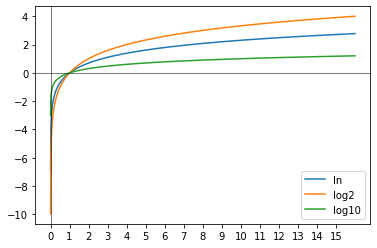

In [206]:
def create_graph():
    x = np.linspace(0.001, 16, 2000)
    y_e = np.log(x)    # y = ln(x)
    y_2 = np.log2(x)   # y = log_2(x)
    y_10 = np.log10(x) # y = log(x)
    
    plt.plot(x, y_e)
    plt.plot(x, y_2)
    plt.plot(x, y_10)
    
    plt.legend(['ln', 'log2', 'log10'], loc='lower right')
    plt.xticks(range(math.floor(min(x)), math.ceil(max(x))))
    plt.axhline(color='black', linewidth=0.5)
    plt.axvline(color='black', linewidth=0.5)
    plt.show()

create_graph()

## Sympy

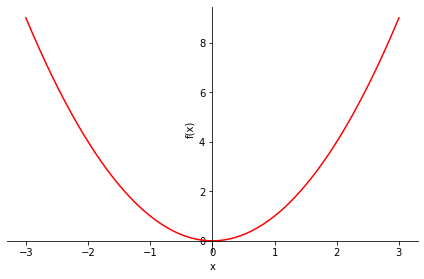

In [207]:
from sympy.plotting import *
from sympy import Symbol

x = Symbol("x")
plot1 = plot(x**2, (x, -3, 3), show=False)
plot1[0].line_color='r'
plot1.show()

Plotting 2 functions on the same axes:

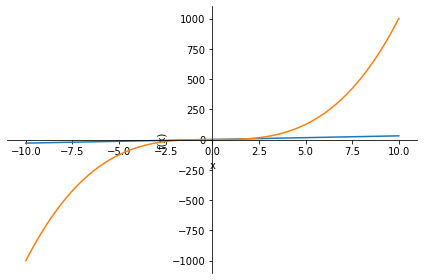

In [208]:
f1 = 3*x + 1
f2 = x**3
plot(f1, f2);

Example with a **piecewise function**:

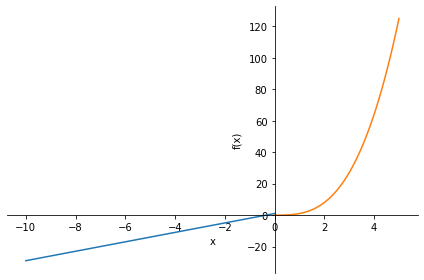

In [209]:
f1 = 3*x + 1
f2 = x**3
plot((f1, (x, -10, 0)), (f2, (x, 0, 5)));

### Quadratic calculator

In [210]:
from numpy import sqrt
from sympy.plotting import *
from sympy import Symbol

In [211]:
# ax^2 + bx + c
def zeros(a, b, c):
    D = sqrt(b*b - 4*a*c)
    x1 = (-b + D) / (2*a)
    x2 = (-b - D) / (2*a)
    print("The first root is: ", x1)
    print("The second root is: ", x2)

In [212]:
def printGraph(a, b, c):
    x = Symbol("x")
    plot(a*x**2 + b*x + x)

In [213]:
# x^2 + 2x + 1
zeros(1, 2, 1)

The first root is:  -1.0
The second root is:  -1.0


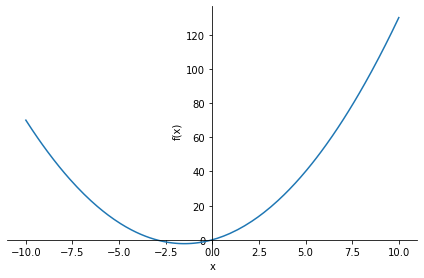

In [214]:
printGraph(1, 2, 1)